In [1]:
import numpy as np

### 1. column_stack, concatenation, hstack, vstack in numpy

In [2]:
a = np.array([1, 2, 3])
b = np.array([4, 55, 66])
c = np.array([34, 77, 98])

In [3]:
np.column_stack((a, b, c))

array([[ 1,  4, 34],
       [ 2, 55, 77],
       [ 3, 66, 98]])

In [4]:
np.hstack((a, b, c))

array([ 1,  2,  3,  4, 55, 66, 34, 77, 98])

In [5]:
np.hstack((np.array([[1], [2]]), np.array([[3], [4]])))

array([[1, 3],
       [2, 4]])

In [6]:
np.vstack((a, b, c))

array([[ 1,  2,  3],
       [ 4, 55, 66],
       [34, 77, 98]])

In [7]:
np.vstack((a, b, c)).T == np.column_stack((a, b, c))

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [8]:
np.concatenate((a, b, c), axis=0)

array([ 1,  2,  3,  4, 55, 66, 34, 77, 98])

In [9]:
np.concatenate((np.array([[1], [2]]), np.array([[3], [4]])), axis=0)

array([[1],
       [2],
       [3],
       [4]])

In [10]:
np.concatenate((np.array([[1], [2]]), np.array([[3], [4]])), axis=1)

array([[1, 3],
       [2, 4]])

### 2. introduction to linear algebra  with numpy 

In [11]:
a = np.arange(1, 5, dtype=float).reshape(2, 2)

In [12]:
a

array([[1., 2.],
       [3., 4.]])

In [13]:
# transpose
a.T

array([[1., 3.],
       [2., 4.]])

In [14]:
# trace
a.trace()

5.0

In [15]:
# determinant
np.linalg.det(a)

-2.0000000000000004

In [16]:
# rank
np.linalg.matrix_rank(a)

2

In [17]:
# inverse
np.linalg.inv(a)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [18]:
# inverse
np.linalg.inv(np.array([[1, 2], [2, 4]]))

LinAlgError: Singular matrix

In [19]:
# unit matrix
np.eye(2)

array([[1., 0.],
       [0., 1.]])

In [20]:
# dot product
np.dot(a, np.eye(2))


array([[1., 2.],
       [3., 4.]])

In [21]:
# dot product
b = np.array([[2, 3, 10], [1, 0, 0]], dtype=float)
np.dot(a, b)

array([[ 4.,  3., 10.],
       [10.,  9., 30.]])

In [22]:
np.dot(b, a)

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

In [23]:
# matrix power (works only for square matrixes)
np.linalg.matrix_power(a, 2)

array([[ 7., 10.],
       [15., 22.]])

In [24]:
np.linalg.matrix_power(a, 2) == np.dot(a, a)

array([[ True,  True],
       [ True,  True]])

In [25]:
np.linalg.matrix_power(a, 3) == np.dot(a, np.dot(a, a))

array([[ True,  True],
       [ True,  True]])

In [26]:
np.linalg.matrix_power(b, 3)

ValueError: input must be a square array

In [27]:
# vector norms
np.linalg.norm(np.array((4, 3)))

5.0

### 3. more linear algebra  with scipy

###### scipy.linalg contains all the functions in numpy.linalg. plus some other more advanced ones not contained in numpy.linalg

In [28]:
import scipy.linalg
import scipy as sc

#### a) Matrix decomposition

https://en.wikipedia.org/wiki/Matrix_decomposition

* Eigenvalues and eigenvectors

https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix

\begin{align}
\ A - matrix, \lambda - eigenvalues, v - eigenvectors \\
\ Av = \lambda v \\
\ |A - \lambda I| = 0 \\
\ A = Q \Lambda Q^{-1}, \\
\end{align}

where Q is the square (N×N) matrix whose $ i^{th} $ column is the eigenvector $ v_{i} $ of A and Λ is the diagonal matrix whose diagonal elements are the corresponding eigenvalues, i.e., $\Lambda_{ii}= \lambda_{i} $.

In [29]:
a = np.array([[1, 5, 2], [2, 4, 1], [3, 6, 2]])
a

array([[1, 5, 2],
       [2, 4, 1],
       [3, 6, 2]])

\begin{align}
\ \|A - \lambda I\| = - \lambda^3 + 7\lambda^2 + 8\lambda - 3 = 0 \\
\ \lambda_{1} = 7.9579, \lambda_{2} = -1.2577, \lambda_{3} = 0.2997
\end{align}

In [30]:
values, vectors = sc.linalg.eig(a)

In [31]:
values

array([ 7.9579162 +0.j, -1.25766471+0.j,  0.2997485 +0.j])

In [32]:
vectors

array([[-0.5297175 , -0.90730751,  0.28380519],
       [-0.44941741,  0.28662547, -0.39012063],
       [-0.71932146,  0.30763439,  0.87593408]])

In [33]:
# vector 1
vectors[:, 0]

array([-0.5297175 , -0.44941741, -0.71932146])

In [34]:
# vector 2
vectors[:, 1]

array([-0.90730751,  0.28662547,  0.30763439])

In [35]:
# vector 3
vectors[:, 2]

array([ 0.28380519, -0.39012063,  0.87593408])

###### checking that everthing is computeted correctly  $ A = Q \Lambda Q^{-1} $

In [36]:
Q = vectors
LAMBDA = np.eye(3) * values

In [37]:
np.dot(Q, np.dot(LAMBDA, np.linalg.inv(Q)))

array([[1.+0.j, 5.+0.j, 2.+0.j],
       [2.+0.j, 4.+0.j, 1.+0.j],
       [3.+0.j, 6.+0.j, 2.+0.j]])

In [38]:
a

array([[1, 5, 2],
       [2, 4, 1],
       [3, 6, 2]])

* Singular Value Decomposition - SVD

https://en.wikipedia.org/wiki/Singular-value_decomposition

Singular Value Decomposition (SVD) can be thought of as an extension of the eigenvalue problem to matrices that are not square. Let $A$ be an $M \times N$ matrix with $M$ and $N$ arbitrary. The matrices $AA^H$ and $A^HA$ are square hermitian matrices of size $N \times N$  and $M \times M$  respectively. It is known that the eigenvalues of square hermitian matrices are real and non-negative. In addition, there are at most $min(M, N)$ identical non-zero eigenvalues of $AA^H$ and $A^HA$ . Define these positive eigenvalues as $\sigma_{i}^2$. The square-root of these are called singular values of $A$. The eigenvectors of  $A^HA$ are collected by columns into an $ N \times N$  unitary $V$ matrix, while the eigenvectors of $AA^H$ are collected by columns in the unitary matrix $U$, the singular values are collected in an $M \times N$ zero matrix $\Sigma$  with main diagonal entries set to the singular values. Then 
\begin{align}
\ A = U \Sigma V^H, \\
\end{align}

is the singular-value decomposition of $A$. Every matrix has a singular value decomposition. 

In [39]:
U,s,Vh = sc.linalg.svd(a)

In [40]:
U

array([[-0.54203505,  0.83667004, -0.07862088],
       [-0.45920051, -0.37324204, -0.80611741],
       [-0.7037989 , -0.40084114,  0.58650958]])

In [41]:
s

array([9.91839161, 1.25185026, 0.24161707])

In [42]:
Vh

array([[-0.36012218, -0.88419283, -0.29751481],
       [-0.88855473,  0.22793076,  0.39814327],
       [ 0.28422264, -0.40773841,  0.86773664]])

In [43]:
Sigma = np.eye(3) * s

In [44]:
Sigma

array([[9.91839161, 0.        , 0.        ],
       [0.        , 1.25185026, 0.        ],
       [0.        , 0.        , 0.24161707]])

###### checking that everthing is computeted correctly  $ A = U \Sigma V^H $

In [45]:
np.dot(U, np.dot(Sigma, Vh))

array([[1., 5., 2.],
       [2., 4., 1.],
       [3., 6., 2.]])

In [46]:
a

array([[1, 5, 2],
       [2, 4, 1],
       [3, 6, 2]])

###### For more decomposition examples please see the link below:
https://docs.scipy.org/doc/scipy-0.19.1/reference/tutorial/linalg.html

#### b) Matrix pseudo - inverse

When matrix is not a square one then it is not invertible, but there are methods to calculate pseudo inverses of them. Let $A$ be $ M \times N$ matrix. 

If $M > N$, then pseudo inverse $= (A^H A)^{-1} A^H$, 

if $M < N$, then pseudo inverse $= A^H (A A^H)^{-1} $. 

In [47]:
a = np.array([[1, 2, 4], [5, 7, 8]])
a

array([[1, 2, 4],
       [5, 7, 8]])

In [48]:
sc.linalg.pinv(a)

array([[-0.39393939,  0.18181818],
       [-0.27272727,  0.15151515],
       [ 0.48484848, -0.12121212]])

In [49]:
np.dot(a, sc.linalg.pinv(a))

array([[ 1.00000000e+00, -3.33066907e-16],
       [ 4.44089210e-16,  1.00000000e+00]])

In [50]:
b = np.array([[2, 3], [4, 8], [10, 76]])
b

array([[ 2,  3],
       [ 4,  8],
       [10, 76]])

In [51]:
sc.linalg.pinv(b)

array([[ 0.1429713 ,  0.26141742, -0.03316123],
       [-0.01899318, -0.03429836,  0.01751798]])

In [52]:
np.dot(sc.linalg.pinv(b), b)

array([[ 1.00000000e+00,  6.02295991e-15],
       [-4.16333634e-17,  1.00000000e+00]])

#### c) Solving linear system

\begin{align}
\ 2x + 3y - 4z = -8 \\
\ 2y + 6z = 28 \\
\ 3x + 5y + 4z = 29 \\
\end{align}

In [53]:
a = np.array([[2, 3, -4], [0, 2, 6], [3, 5, 4]])
b = np.array([-8, 28, 29])

In [54]:
x = sc.linalg.solve(a, b)

In [55]:
x

array([1., 2., 4.])

In [56]:
# checking
np.dot(sc.linalg.pinv(a), b)

array([1., 2., 4.])

### 3. linear regression implementation

In [57]:
import matplotlib.pyplot as plt

In [58]:
def data_generator(A):
    """
    Generates data for linear regression using given parameters array.
    Some noise is added to final data.
    """
    n = 500
    X_0 = np.ones(n)
    X_1 = np.random.normal(loc=70, scale=2, size=n)
    X = np.column_stack((X_0, X_1))
    Y = np.dot(X, A) + np.random.uniform(high=35, size=n)
    return X, Y

In [59]:
parameters = np.array([30., 3.2])
X, Y = data_generator(parameters)

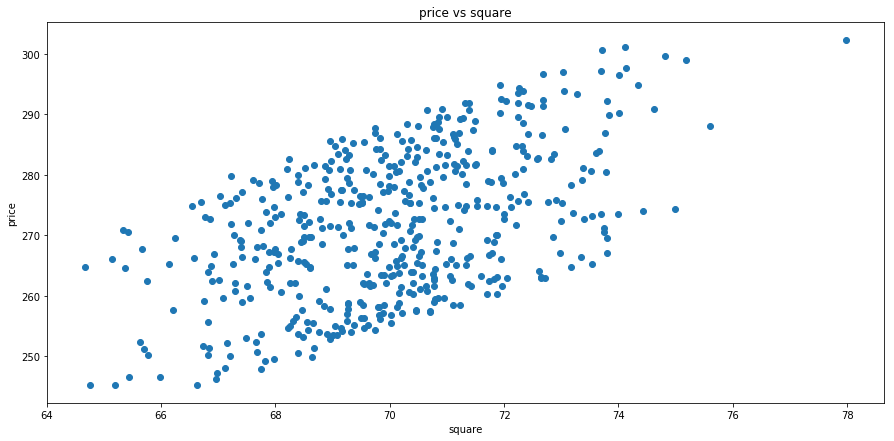

In [60]:
plt.figure(figsize=(15, 7))
plt.scatter(X[:, 1], Y)
plt.xlabel('square')
plt.ylabel('price')
plt.title('price vs square')
plt.show()

according to our solution, we have minimal mean squared error, when $ A = (X^T X)^{-1} X^T Y$.

In [61]:
solution_parameters = np.dot(sc.linalg.pinv(np.dot(X.T, X)), np.dot(X.T, Y))

In [62]:
solution_parameters

array([60.10394143,  3.02152172])

In [63]:
predicted_Y = np.dot(X, solution_parameters)

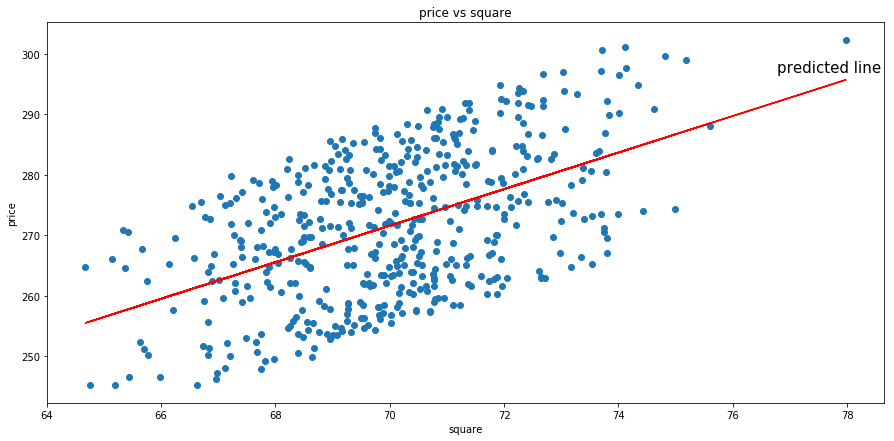

In [64]:
plt.figure(figsize=(15, 7))
plt.scatter(X[:, 1], Y)
plt.plot(X[:, 1], predicted_Y, color='r')
plt.xlabel('square')
plt.ylabel('price')
plt.title('price vs square')
plt.text(X[:, 1].max() - 1.2, predicted_Y.max() + 1.3, 'predicted line', fontsize=15)
plt.show()

### 4. scipy

#### a) introduction to scipy submodules

    scipy : high-level scientific computing

Scipy is a very powerfull tool, which allows to make high-level scientific computations. 
It has the following submodules:
* Clustering package (scipy.cluster)
* Constants (scipy.constants)
* Discrete Fourier transforms (scipy.fftpack)
* Integration and ODEs (scipy.integrate)
* Interpolation (scipy.interpolate)
* Input and output (scipy.io)
* Linear algebra (scipy.linalg)
* Miscellaneous routines (scipy.misc)
* Multi-dimensional image processing (scipy.ndimage)
* Orthogonal distance regression (scipy.odr)
* Optimization and root finding (scipy.optimize)
* Signal processing (scipy.signal)
* Sparse matrices (scipy.sparse)
* Sparse linear algebra (scipy.sparse.linalg)
* Compressed Sparse Graph Routines (scipy.sparse.csgraph)
* Spatial algorithms and data structures (scipy.spatial)
* Special functions (scipy.special)
* Statistical functions (scipy.stats)
* Statistical functions for masked arrays (scipy.stats.mstats)
* Low-level callback functions

We already got acquainted with ***Linear algebra*** submodule. During this course I will introduce also the following submodules:

* Optimization and root finding (scipy.optimize)
* Statistical functions (scipy.stats)
* Integration and ODEs (scipy.integrate)


#### b) Optimization

We will assume that our optimization problem is to minimize some univariate or multivariate function f(x). This is without loss of generality, since to find the maximum, we can simply minime −f(x). We will also assume that we are dealing with multivariate or real-valued smooth functions - non-smooth, noisy or discrete functions are outside the scope of this course and less common in statistical applications.

To find the minimum of a function, we first need to be able to express the function as a mathemtical expresssion. For example, in lesst squares regression, the function that we are optimizing is of the form yi−f(xi,θ) for some parameter(s) θ. To choose an appropirate optimization algorihtm, we should at least answr these two questions if possible:

Is the function convex?
Are there any constraints that the solution must meet?
Finally, we need to realize that optimization mehthods are nearly always designed to find local optima. For convex problems, there is only one minimum and so this is not a problem. However, if there are multiple local minima, often heuristics such as multiple random starts must be adopted to find a “good” enouhg solution.

Is the function convex?
Convex functions are very nice becuase they have a single global minimum, and there are very efficient algorithms for solving large convex systems.

Intuitively, a function is convex if every chord joining two points on the function lies above the function. More formally, a function is convex if

\begin{align}
\ f(ta+(1−t)b) < tf(a)+(1−t)f(b) \\
\end{align}

for some t between 0 and 1 - this is shown in the figure below.

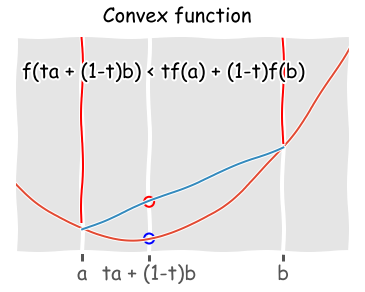

In [65]:
def f(x):
    return (x-4)**2 + x + 1

with plt.xkcd():
    plt.style.use('ggplot')

    x = np.linspace(0, 10, 100)

    plt.plot(x, f(x))
    ymin, ymax = plt.ylim()
    plt.axvline(2, ymin, f(2)/ymax, c='red')
    plt.axvline(8, ymin, f(8)/ymax, c='red')
    plt.scatter([4, 4], [f(4), f(2) + ((4-2)/(8-2.))*(f(8)-f(2))],
                 edgecolor=['blue', 'red'], facecolor='none', s=100, linewidth=2)
    plt.plot([2,8], [f(2), f(8)])
    plt.xticks([2,4,8], ('a', 'ta + (1-t)b', 'b'), fontsize=20)
    plt.text(0.2, 40, 'f(ta + (1-t)b) < tf(a) + (1-t)f(b)', fontsize=20)
    plt.xlim([0,10])
    plt.yticks([])
    plt.suptitle('Convex function', fontsize=20)

    a) Local Optimization

This submodule of scipy trying to find out local minimums of function, so be aware it is just a local minimum and not the global one, so if you function is not convex, then found minimum must not be the global one.

* https://en.wikipedia.org/wiki/Convex_function
* https://en.wikipedia.org/wiki/Maxima_and_minima
* https://en.wikipedia.org/wiki/Derivative_test
* https://en.wikipedia.org/wiki/Second_partial_derivative_test
* https://en.wikipedia.org/wiki/Mathematical_optimization
* https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html
* http://www.bioinfo.org.cn/~wangchao/maa/Numerical_Optimization.pdf
 

* minimize(fun, x0[, args, method, jac, hess, ...]) - Minimization of scalar function of one or more variables.
* minimize_scalar(fun[, bracket, bounds, ...]) - Minimization of scalar function of one variable.

In [66]:
from scipy.optimize import minimize_scalar
from scipy import optimize

\begin{align}
\ f(x) = (x - 2) x (x + 2)^2 \\
\end{align}

In [67]:
def f(x):
    return (x - 2) * x * (x + 2)**2

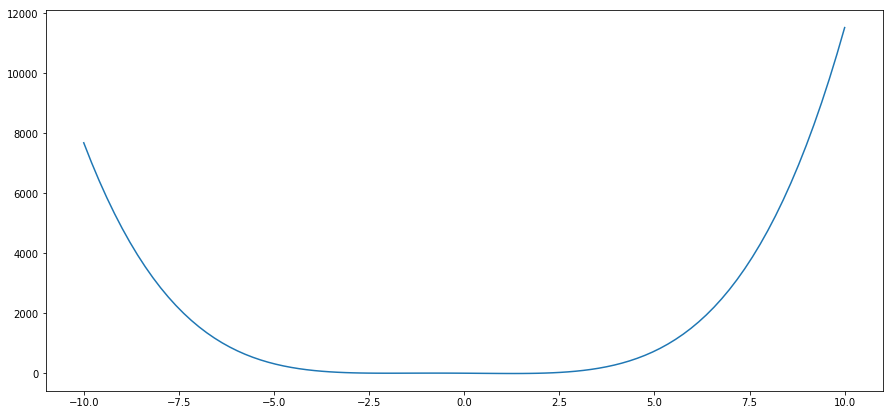

In [68]:
x_s = np.linspace(-10, 10, 100)
y_s = f(x_s)

plt.figure(figsize=(15, 7))
plt.plot(x_s, y_s)
plt.show()

In [69]:
result = minimize_scalar(f)

In [70]:
result

     fun: -9.914949590828147
    nfev: 12
     nit: 11
 success: True
       x: 1.2807764040333458

In [71]:
# minimum point
result.x

1.2807764040333458

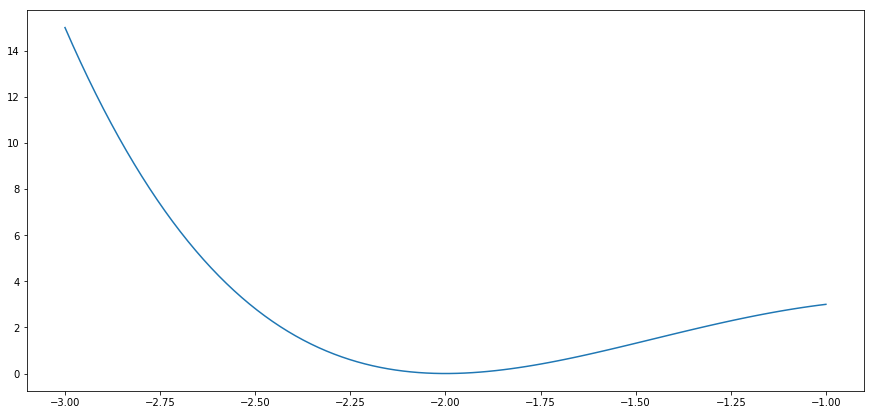

In [72]:
# finding mimium point in bounds (-3, -1)
x_s = np.linspace(-3, -1, 100)
y_s = f(x_s)

plt.figure(figsize=(15, 7))
plt.plot(x_s, y_s)
plt.show()

In [73]:
result = minimize_scalar(f, bounds=(-3, -1), method='bounded')

In [74]:
result

     fun: 3.2836517984978577e-13
 message: 'Solution found.'
    nfev: 12
  status: 0
 success: True
       x: -2.000000202597239

example from homework for gradient descent: 
$ f(x_{1}, x_{2}) = e^{x_{1} + 3x_{2} - 0.1} + e^{x_{1} - 3x_{2} - 0.1} + e^{-x_{1} - 0.1}$

In [75]:
from scipy.optimize import minimize

In [76]:
def f(params):
    x_1, x_2 = params[0], params[1]
    return np.exp(x_1 + 3 * x_2 - 0.1) + np.exp(x_1 - 3 * x_2 - 0.1) + np.exp(-x_1 - 0.1)
    

In [77]:
minimize(f, np.array([3., 4.]))

      fun: 2.559266696658603
 hess_inv: array([[0.38986157, 0.0015613 ],
       [0.0015613 , 0.08399171]])
      jac: array([ 3.87430191e-07, -2.80141830e-06])
  message: 'Optimization terminated successfully.'
     nfev: 108
      nit: 26
     njev: 27
   status: 0
  success: True
        x: array([-3.46573461e-01, -2.52259053e-07])

In [78]:
def jac(params):
    x_1, x_2 = params[0], params[1]
    d_x_1 = np.exp(x_1 + 3 * x_2 - 0.1) + np.exp(x_1 - 3 * x_2 - 0.1) - np.exp(-x_1 - 0.1)
    d_x_2 = 3 * np.exp(x_1 + 3 * x_2 - 0.1) - 3 * np.exp(x_1 - 3 * x_2 - 0.1)
    return np.array([d_x_1, d_x_2])
    

In [79]:
minimize(f, np.array([3., 4.]), jac=jac)

      fun: 2.559266696658574
 hess_inv: array([[0.38987661, 0.00155024],
       [0.00155024, 0.08400079]])
      jac: array([ 3.40288352e-07, -2.78070277e-06])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 26
     njev: 27
   status: 0
  success: True
        x: array([-3.46573457e-01, -2.41449579e-07])

When Jacobian is not given, then it is calculated numerically. You can check that when it is given, solution is more close to theoretical solution:

In [80]:
- np.log(2) / 2, 0

(-0.34657359027997264, 0)

Now lets try to find minimum for Linear Regression:

In [81]:
def f(params):
    loss = ((np.dot(X, params) - Y)**2).sum()
    return loss

In [82]:
minimize(f, np.array([0, 0]), )

      fun: 51800.41573237665
 hess_inv: array([[ 8.00757586e-01, -1.14188320e-02],
       [-1.14188320e-02,  1.63036549e-04]])
      jac: array([0.        , 0.00048828])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 311
      nit: 7
     njev: 75
   status: 2
  success: False
        x: array([60.10430324,  3.02151655])

In [83]:
solution_parameters

array([60.10394143,  3.02152172])

Even there is a special function for linear regression:

In [84]:
result = optimize.lsq_linear(X, Y)

In [85]:
result.x

array([60.10394144,  3.02152172])

In [86]:
solution_parameters

array([60.10394143,  3.02152172])

#### c) Global Optimization

In [87]:
def f(x):
    return -np.sinc(x-5)

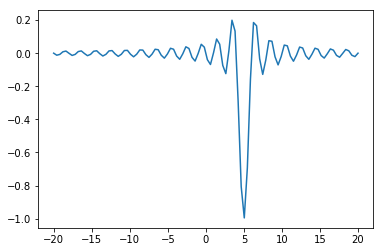

In [88]:
x_s = np.linspace(-20, 20, 100)
plt.plot(x_s, f(x_s));

In [89]:
# depending on intial starting point it will find differenet local minimum, 
# which can be different than the global one

solution = minimize_scalar(f)

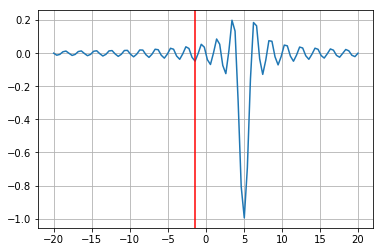

In [90]:
plt.plot(x_s, f(x_s))
plt.axvline(solution.x, color='red')
plt.grid()

In [91]:
# We can try multiple ranodm starts to find the global minimum
lower = np.random.uniform(-20, 20, 100)
upper = lower + 1
sols = [minimize_scalar(f, bracket=(l, u)) for (l, u) in zip(lower, upper)]

In [92]:
idx = np.argmin([sol.fun for sol in sols])
sol = sols[idx]

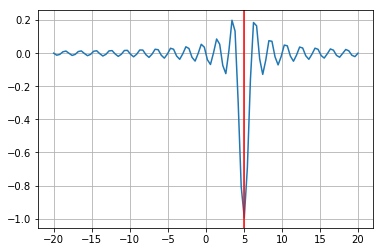

In [93]:
plt.plot(x_s, f(x_s))
plt.axvline(sol.x, color='red');
plt.grid()

In [94]:
# instead of grid search we can use another functions from scipy 
# which are doing almost the same search in coordinates space

In [95]:
x0 = 0
sol = optimize.basinhopping(f, x0, stepsize=1, minimizer_kwargs={"method": "BFGS"})
sol

                        fun: -0.0709134594504621
 lowest_optimization_result:       fun: -0.0709134594504621
 hess_inv: array([[1.42906272]])
      jac: array([-3.7252903e-09])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 8
   status: 0
  success: True
        x: array([0.5225914])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 2001
                        nit: 100
                       njev: 667
                          x: array([0.5225914])

In [96]:
# another example
def f(x):
    return x**3 + 3 * x**2 - 2 * x + 1

In [97]:
# local minimum
local_min = minimize_scalar(f, bounds=[-4, 2])
local_min

     fun: 0.6966851708806479
    nfev: 11
     nit: 10
 success: True
       x: 0.29099445255791706

In [98]:
# global minimum
global_min = optimize.differential_evolution(f, bounds = [(-4, 2)])
global_min

     fun: array([-7.])
     jac: array([21.99999987])
 message: 'Optimization terminated successfully.'
    nfev: 244
     nit: 15
 success: True
       x: array([-4.])

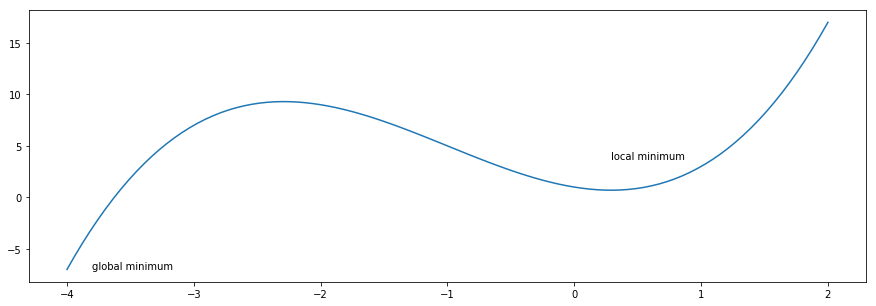

In [99]:
x_s = np.linspace(-4, 2, 100)
y_s = f(x_s)

plt.figure(figsize=(15, 5))
plt.plot(x_s, y_s)
plt.annotate('local minimum' , (local_min.x, f(local_min.x) + 3))
plt.annotate('global minimum' , (global_min.x+0.2, f(global_min.x)))
plt.show()

multivariate function :  $f(x,y)= 100(y−x^2)^2+(1−x)^2$


In [100]:
def f(params):
    x, y = params[0], params[1]
    return 100 * (y - x**2)**2 + (1 - x)**2 

In [101]:
x_s = np.linspace(-5, 5, 100)
y_s = np.linspace(-5, 5, 100)
X_s, Y_s = np.meshgrid(x_s, y_s)
Z_s = np.array([f((x, y)) for x, y in zip(X_s.ravel(), Y_s.ravel())])
Z_s = Z_s.reshape(X_s.shape)

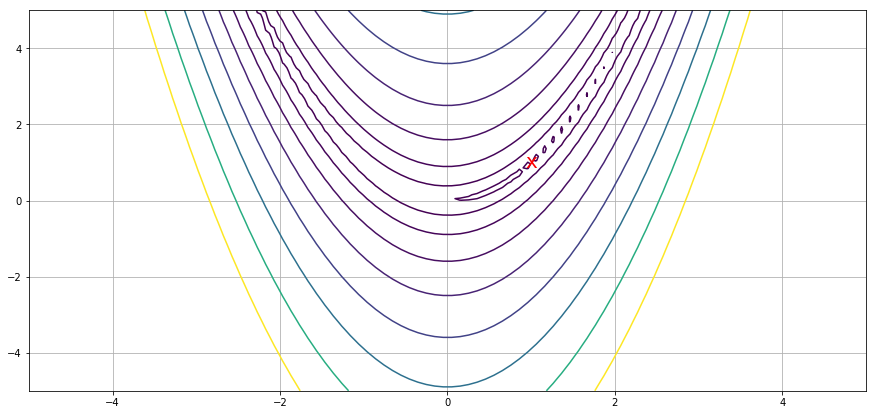

In [103]:
# Note: the global minimum is at (1,1) in a tiny contour island
plt.figure(figsize=(15, 7))
plt.contour(X_s, Y_s, Z_s, np.arange(10)**4)
plt.text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20)
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


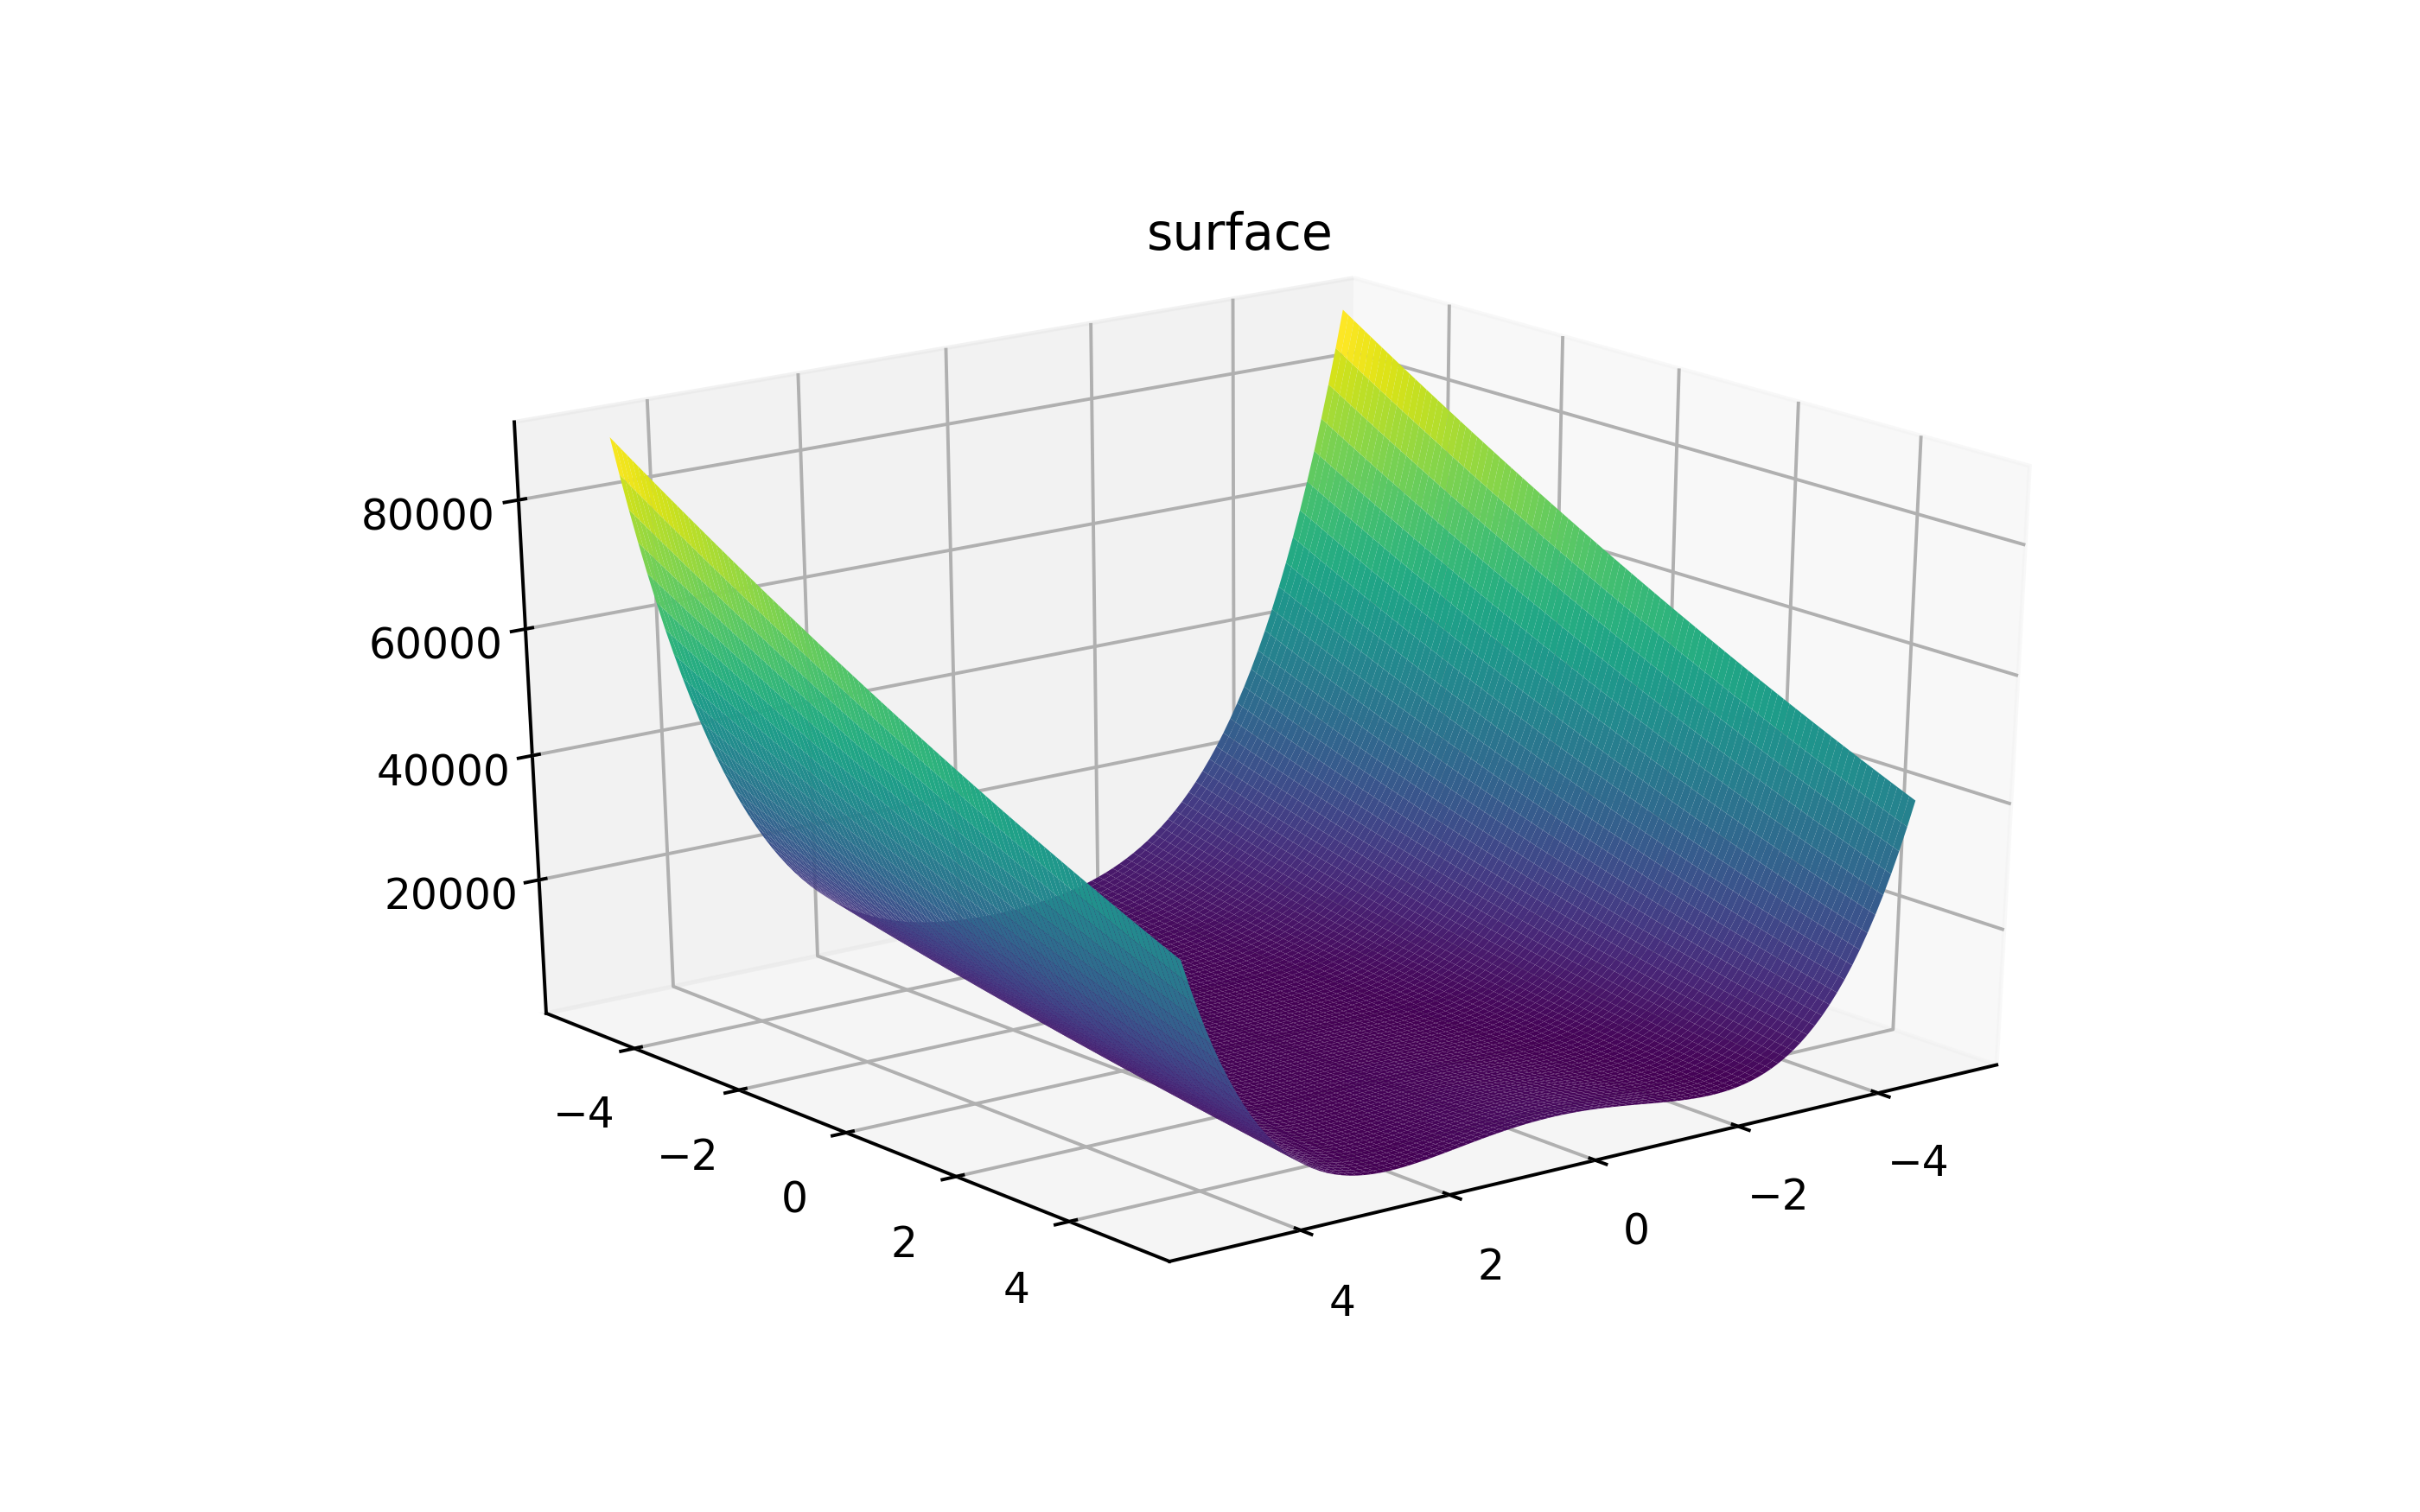

In [104]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
ax.plot_surface(X_s, Y_s, Z_s, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

In [105]:
minimize(f, [0, 0])

      fun: 2.8439854262904333e-11
 hess_inv: array([[0.49482461, 0.98957648],
       [0.98957648, 1.98394242]])
      jac: array([ 3.98678486e-06, -2.84414614e-06])
  message: 'Optimization terminated successfully.'
     nfev: 96
      nit: 19
     njev: 24
   status: 0
  success: True
        x: array([0.99999467, 0.99998932])

In [106]:
# calculating Jacobian and Hessian sybolically
from sympy import symbols, hessian, Function, Derivative, diff

x, y = symbols('x y')
f_ = symbols('f', cls=Function)

f_ = 100*(y - x**2)**2 + (1 - x)**2

In [107]:
diff(f_, x).simplify()

400*x*(x**2 - y) + 2*x - 2

In [108]:
diff(f_, y).simplify()

-200*x**2 + 200*y

In [109]:
hessian(f_, [x, y])

Matrix([
[1200*x**2 - 400*y + 2, -400*x],
[               -400*x,    200]])

In [110]:
def jac(params):
    x, y = params[0], params[1]
    d_x = 400 * x * (x**2 - y) + 2 * x - 2
    d_y = -200 * x **2 + 200 * y
    return np.array([d_x, d_y])

In [111]:
def hessian(params):
    x, y = params[0], params[1]
    d_x_x = 1200 * x**2 - 400 * y + 2
    d_x_y = -400 * x
    d_y_x = -400 * x
    d_y_y = 200
    
    hes_matrix = np.empty((2, 2))
    hes_matrix[0, 0] = d_x_x
    hes_matrix[0, 1] = d_x_y
    hes_matrix[1, 0] = d_y_x
    hes_matrix[1, 1] = d_y_y
    return hes_matrix

In [112]:
minimize(f, [0, 0], jac=jac, hess=hessian, method='Newton-CG', tol=1e-6)

     fun: 3.2094012553276374e-18
     jac: array([ 5.94461715e-07, -2.98427409e-07])
 message: 'Optimization terminated successfully.'
    nfev: 55
    nhev: 35
     nit: 35
    njev: 89
  status: 0
 success: True
       x: array([1., 1.])

**Gradient Descent**

In [113]:
def gradient_descent(starting_points, alpha, max_iter=50000, tol=1e-10):
    current_x, current_y = starting_points[0], starting_points[1]
    n_iter = 0
    
    states = [(current_x, current_y)]
    while True:
        function_current_value = f((current_x, current_y))
        d_x, d_y = jac((current_x, current_y))
        
        updated_x = current_x - alpha * d_x
        updated_y = current_y - alpha * d_y
         
        states.append((updated_x, updated_y))
        n_iter += 1
        
        if n_iter > max_iter:
            break
        
        function_updates_value = f((updated_x, updated_y))
        
        if abs(function_updates_value - function_current_value) < tol:
            break
            
        current_x = updated_x
        current_y = updated_y
    return states

In [114]:
points = gradient_descent([4, -4], 0.0002)

In [115]:
solution = points[-1]

solution

(0.9943679108003383, 0.9887449282025546)

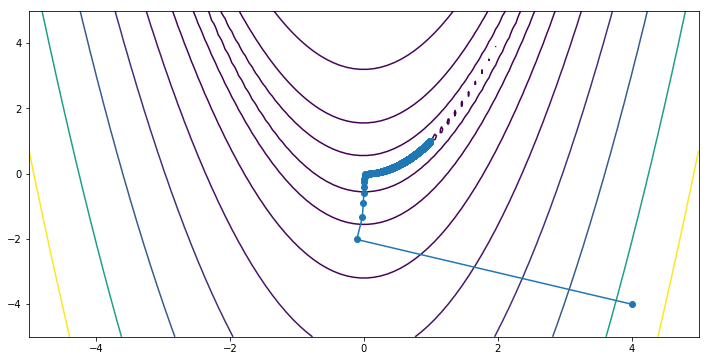

In [118]:
% matplotlib inline

points = np.array(points)
plt.figure(figsize=(12,6))
plt.contour(X_s, Y_s, Z_s, np.arange(10)**5)
plt.plot(points[:, 0][::10], points[:, 1][::10], '-o');

#### d) Root finding example

solving $f(x) = 0$ equation

In [119]:
def f(x):
    return x**2 - 1

In [120]:
optimize.brentq(f, a=-2, b=0)

-1.0

In [121]:
optimize.brentq(f, a=0, b=2)

1.0

In [122]:
def f(x):
    return x * (np.exp(x) - np.exp(2))

In [123]:
optimize.newton(f, -10)

-1.0374286720419246e-13

In [124]:
optimize.newton(f, 10)

2.0

In [125]:
def f_prime(x):
    return np.exp(x) - np.exp(2) + x * np.exp(x)

In [126]:
optimize.newton(f, -10, fprime=f_prime)

-9.860761315262648e-32

In [127]:
optimize.newton(f, -10, fprime=f_prime, tol=1e-16)

0.0

#### d) Numeric integration

    general integration

In [128]:
from scipy import integrate

In [129]:
def f(x):
    return x

In [130]:
integrate.quad(f, 0, 2)

(2.0, 2.220446049250313e-14)

In [131]:
f = lambda x: np.cos(x)

In [132]:
integrate.quad(f, 0, np.pi,)

(4.9225526349740854e-17, 2.2102239425853306e-14)

In [133]:
f = lambda x: np.exp(x) * x + 2 * np.log(x ** 2 * np.sin(np.arctan(np.sqrt(x))))

In [134]:
integrate.quad(f, 1., 2.)

(8.410985399645664, 9.33806965047264e-14)

integration of pdf of Standard Normal Distribution : 
$pdf(x) = \frac{1}{\sqrt{2 \pi}} \exp({- x^2 / 2})$

In [135]:
f = lambda x: (1 / np.sqrt(2 * np.pi)) * np.exp(- x**2 / 2)

In [136]:
integrate.quad(f, -np.inf, np.inf)

(0.9999999999999997, 1.017819145094224e-08)

    double integration

Double integration:

\begin{align}
\ I_{n} = \int_{0}^{\infty} \int_{1}^{\infty} \frac{e^{-xt}}{t^n} dt dx = \frac{1}{n}
\end{align}


In [137]:
n = 5
f = lambda t, x: np.exp(-x * t) / t**n

In [138]:
integrate.dblquad(f, 0, np.inf, lambda x: 1, lambda x: np.inf)

(0.2000000000189363, 1.3682975855986131e-08)

In [139]:
1/n

0.2

In [140]:
n = 4
f = lambda t, x: np.exp(-x * t) / t**n

In [141]:
integrate.dblquad(f, 0, np.inf, lambda x: 1, lambda x: np.inf)

(0.2500000000043577, 1.2983033469368098e-08)

In [142]:
1/n

0.25

Double integration:

\begin{align}
\ I = \int_{y=0}^{1/2} \int_{x=0}^{1-2y} xy dy dx = \frac{1}{96}
\end{align}


In [143]:
integrate.dblquad(lambda x, y: x * y, 0, 0.5, lambda x: 0, lambda x: 1-2 * x)

(0.010416666666666668, 4.101620128472366e-16)

In [144]:
1/96

0.010416666666666666

    n integration

In [145]:
N = 5
def f(t, x):
    return np.exp(-x * t) / t**N

In [146]:
integrate.nquad(f, [[1, np.inf],[0, np.inf]])

(0.2000000000189363, 1.3682975855986131e-08)

In [147]:
def f(x, y):
    return x * y

def bounds_y():
    return [0, 0.5]

def bounds_x(y):
    return [0, 1 - 2 * y]
    
integrate.nquad(f, [bounds_x, bounds_y])

(0.010416666666666668, 4.101620128472366e-16)

#### e) Ordinary Differential Equations

* https://en.wikipedia.org/wiki/Ordinary_differential_equation

\begin{align}
\ \frac{dy}{dt} = - 2y \\
\ \text{between}\ t = 0 \dots 4, \text{with the initial condition}\ y(t=0) = 1
\end{align}

In [148]:
from scipy.integrate import odeint

In [149]:
def f_derivative(y, t):
    return -2 * y

In [150]:
t_vec = np.linspace(0, 4, 40)
y = odeint(f_derivative, y0=1, t=t_vec)

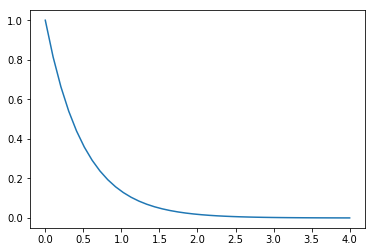

In [151]:
plt.plot(t_vec, y);

correct solution $ y = e^{-2t}$

In [152]:
def sol(t):
    return np.exp(-2 * t)

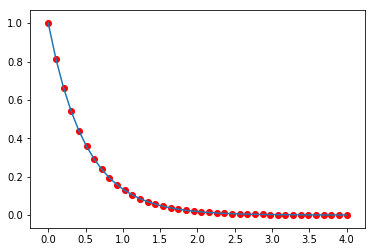

In [153]:
plt.plot(t_vec, y)
plt.scatter(t_vec, sol(t_vec), c='red');